# 📘 Introducción a Imágenes Digitales con Python y Scikit-learn
🧠 ¿Qué es una imagen digital?
Una imagen digital es una matriz de números que representan la intensidad de luz en cada punto (o píxel).
Cada número indica cuán clara u oscura es esa parte de la imagen:

En escala de grises: los valores suelen ir de 0 (negro) a 255 (blanco).

En imágenes de color: hay tres matrices (una por cada canal R, G y B).

En este ejemplo usaremos el dataset digits de sklearn, que contiene imágenes en blanco y negro de números del 0 al 9, con tamaño 8x8 píxeles (muy pequeñas para simplificar el procesamiento).


# 📷 ¿Cómo se obtuvieron estas imágenes?
Este dataset viene de una colección clásica de scikit-learn llamada Digits Dataset, y contiene imágenes de dígitos escritos a mano en formularios escaneados. Algunas características clave:

Cada imagen fue escalada y centrada en un cuadrado de 8×8 píxeles.

El resultado final es una imagen de muy baja resolución (¡solo 64 píxeles en total!).

El color representa la intensidad del trazo:

0: fondo (negro).

16: trazo fuerte (blanco).

Valores intermedios: grises.

Como veremos, parece que los números fueron escritos con algo blanco (como una tiza) sobre un fondo oscuro, porque los valores más altos (más claros) corresponden al trazo.

Esto se debe a la normalización visual que se hizo al preprocesar las imágenes. No necesariamente se usó tiza: probablemente se invirtieron los colores para mejorar el contraste visual y uniformizar las entradas para los algoritmos.

# 📦 Carga del dataset y descripción general

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargar dataset
digits = load_digits()


# 🔍 ¿Qué contiene este dataset?
El dataset tiene:

digits.data: una matriz donde cada fila es una imagen "aplanada" (64 columnas)

digits.images: las mismas imágenes pero en formato 8x8

digits.target: la etiqueta (0 al 9)

Atención: digits no es un archivo ni un DataFrame, sino un objeto tipo diccionario de scikit-learn llamado Bunch, que actúa como una caja con varios compartimentos:



| Atributo                          | Descripción                                                               |
| --------------------------------- | ------------------------------------------------------------------------- |
| `digits.data`                     | Un array de forma (1797, 64): cada fila es una imagen aplanada (8×8 = 64) |
| `digits.images`                   | Un array de forma (1797, 8, 8): las mismas imágenes como matrices 2D      |
| `digits.target`                   | Un array de forma (1797,): la etiqueta o clase (el número escrito a mano) |
| `digits.DESCR`                    | Texto descriptivo del dataset (documentación)                             |
| `digits.feature_names` (opcional) | Nombres de las "columnas", no siempre está presente                       |


🧮 Dimensiones:
Hay 1797 imágenes de 8x8 píxeles (es decir, 64 características por imagen).


In [2]:
print("Shape de data:", digits.data.shape)     # (1797, 64)
print("Shape de images:", digits.images.shape) # (1797, 8, 8)
print("Shape de target:", digits.target.shape) # (1797,)


Shape de data: (1797, 64)
Shape de images: (1797, 8, 8)
Shape de target: (1797,)


# 👀 ¿Qué significa "aplanada"?
Una imagen de 8x8 se convierte en un vector de 64 elementos (de izquierda a derecha, fila por fila).

In [3]:
# Mostrar imagen original y su vector aplanado
index = 7 #cambiar para ver los otros números del 0 al 9
print("Etiqueta:", digits.target[index])
print("Imagen como matriz (8x8):")
print(digits.images[index])
print("\nImagen como vector (1x64):")
print(digits.data[index])


Etiqueta: 7
Imagen como matriz (8x8):
[[ 0.  0.  7.  8. 13. 16. 15.  1.]
 [ 0.  0.  7.  7.  4. 11. 12.  0.]
 [ 0.  0.  0.  0.  8. 13.  1.  0.]
 [ 0.  4.  8.  8. 15. 15.  6.  0.]
 [ 0.  2. 11. 15. 15.  4.  0.  0.]
 [ 0.  0.  0. 16.  5.  0.  0.  0.]
 [ 0.  0.  9. 15.  1.  0.  0.  0.]
 [ 0.  0. 13.  5.  0.  0.  0.  0.]]

Imagen como vector (1x64):
[ 0.  0.  7.  8. 13. 16. 15.  1.  0.  0.  7.  7.  4. 11. 12.  0.  0.  0.
  0.  0.  8. 13.  1.  0.  0.  4.  8.  8. 15. 15.  6.  0.  0.  2. 11. 15.
 15.  4.  0.  0.  0.  0.  0. 16.  5.  0.  0.  0.  0.  0.  9. 15.  1.  0.
  0.  0.  0.  0. 13.  5.  0.  0.  0.  0.]


# 🎨 Visualización de una imagen

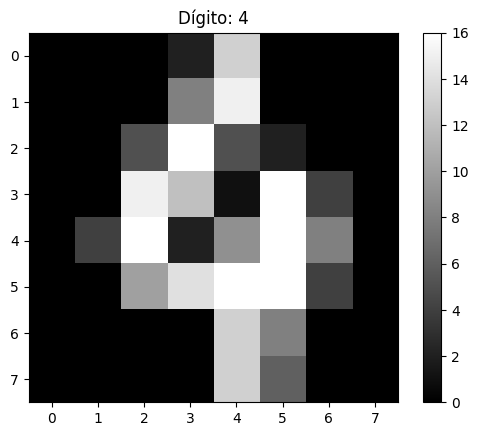

In [5]:
plt.gray()  # Escala de grises
plt.imshow(digits.images[100], cmap='gray') # selecciona la primera imagen del dataset (puede variar de 0 a 1796)
plt.title(f'Dígito: {digits.target[100]}') # muestra la etiqueta correspondiente, es decir, qué número fue escrito a mano. (de 0 a 9)
plt.colorbar()
plt.show()


# 🧑‍🏫 ¿Qué representan los valores de la imagen?
Cada valor representa la intensidad de luz (0 a 16).
¡No es de 0 a 255 porque las imágenes están normalizadas a 16 niveles para simplificar!

# 🔢 Visualizar varias imágenes con sus etiquetas

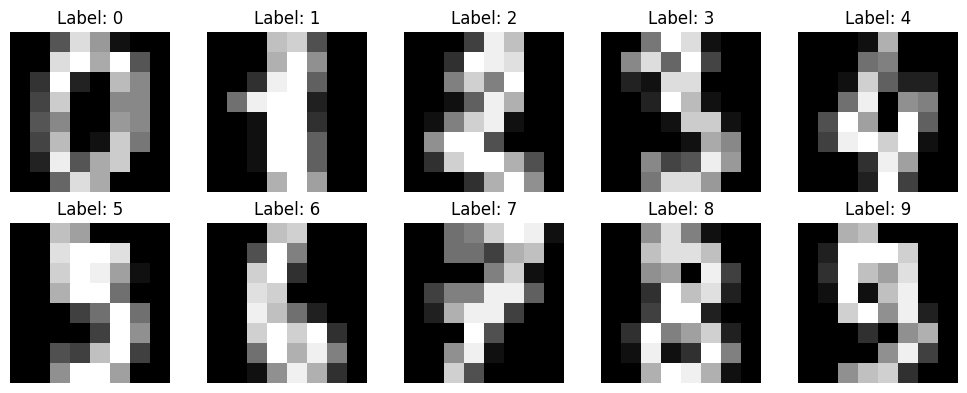

In [5]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


# 🧮 ¿Por que no usar .head()?
Así como está no se puede .head() es útil cuando se trabaja con pandas.DataFrame.
Acá digits.data es un numpy.ndarray, así que se accede por índices:

In [11]:
print(digits.data[:5])  # Primeras 5 imágenes en formato vector



[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

# Ver todo en formato DataFrame (más bonito):
Si convertimos en dataframe si ya se puede usar .head()

In [10]:
df = pd.DataFrame(digits.data)
df["target"] = digits.target
df.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


# 📊 Distribución de las clases

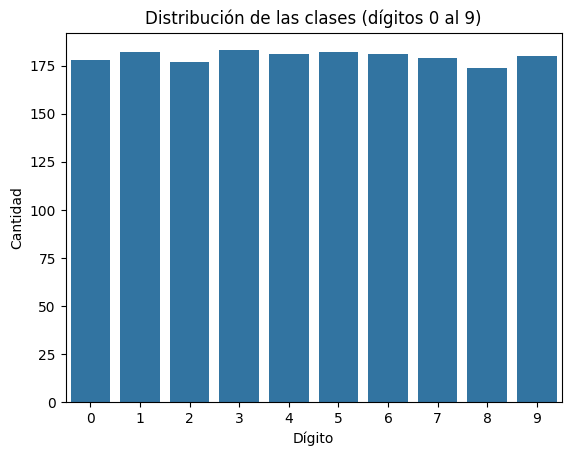

In [12]:
import seaborn as sns

sns.countplot(x=digits.target)
plt.title("Distribución de las clases (dígitos 0 al 9)")
plt.xlabel("Dígito")
plt.ylabel("Cantidad")
plt.show()


# 🧾 Resumen

Este dataset contiene 1797 imágenes de dígitos escritos a mano.

Cada imagen tiene 8x8 píxeles en escala de grises (valores de 0 a 16).

Se puede visualizar fácilmente con imshow().

Las imágenes pueden representarse como matrices o vectores.

Es un excelente punto de partida para introducir procesamiento de imágenes.

